In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
import seaborn as sns

In [3]:
# Create engine for getting the data from the database made in postgres.
engine = create_engine('postgresql://postgres@localhost:5432/employee_DB')

# Connecting the engine for get the data from the table.
connection = engine.connect()

In [4]:
# Queries to read sql file using the connection.
# Read the departments table.
departments = pd.read_sql("SELECT * FROM departments",connection)

# Read the department employee table.
dept_emp = pd.read_sql("SELECT * FROM dept_emp",connection)

# Read the department manager table.
dept_manager = pd.read_sql("SELECT * FROM dept_manager",connection)

# Read the employee table.
employee = pd.read_sql("SELECT * FROM employees",connection)

# Read the salaries table.
salaries = pd.read_sql("SELECT * FROM salaries",connection)

# Read the title table.
title = pd.read_sql("SELECT * FROM titles",connection)

In [5]:
# Display the employee table.
employee

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [6]:
# Display the salaries table.
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
# Merge the dataframe table emplyee and salaries on= "emp_no".
merge_data = pd.merge(employee,salaries,on="emp_no")

In [8]:
# Rename the "emp_title" columns as "title_id" for further usage.
merge_data= merge_data.rename(columns={"emp_title":"title_id"})
merge_data

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [9]:
# Display the title table.
title

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [10]:
# Merge the merge_data and title on= "title_id".
title_salary = pd.merge(merge_data,title,on="title_id")
title_salary

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


In [11]:
#Bonus part down below.

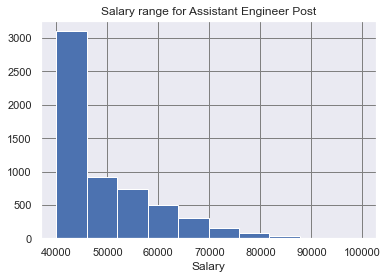

In [19]:
# Most common salary range for "Assistant Engineer" title.
assist_salary = title_salary.loc[title_salary["title"]=="Assistant Engineer"]

# Create a Histogram for the Assistant Engineer title salary.
plt.hist(assist_salary["salary"])
plt.title("Salary range for Assistant Engineer Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

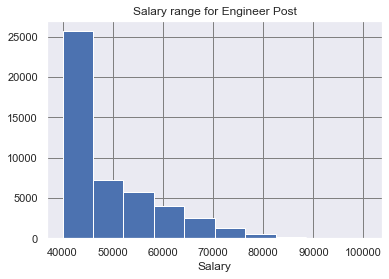

In [18]:
# Most common salary range for "Engineer" title.
eng_salary = title_salary.loc[title_salary["title"]=="Engineer"]

# Create a Histogram for the engineer title salary
plt.hist(eng_salary["salary"],)
plt.title("Salary range for Engineer Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

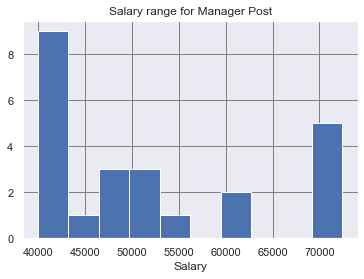

In [21]:
# Most common salary range for "Manger" title.
manager_salary = title_salary.loc[title_salary["title"]=="Manager"]

# Create a histogram for Manager title salary.
plt.hist(manager_salary["salary"])
plt.title("Salary range for Manager Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

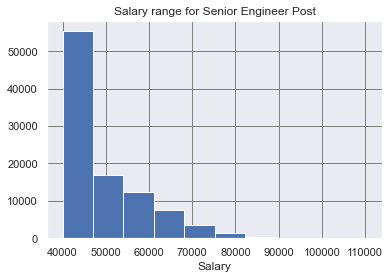

In [23]:
# Most Common salary range for "Senior Engineer" title.
sin_mang_salary = title_salary.loc[title_salary["title"]=="Senior Engineer"]

# Create a histogram for Senior Engineer title salary.
plt.hist(sin_mang_salary["salary"])
plt.title("Salary range for Senior Engineer Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

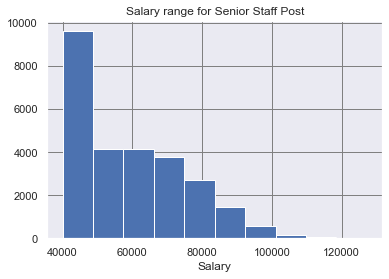

In [24]:
# Most common salary range for "Senior Staff" title.
sin_staff_salary= title_salary.loc[title_salary["title"]=="Senior Staff"]

# Create a histogram for Senior staff title salary.
plt.hist(sin_staff_salary["salary"])
plt.title("Salary range for Senior Staff Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

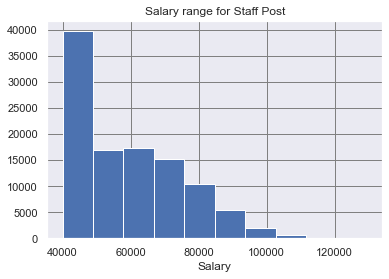

In [25]:
# Most common salary for "Staff" title.
staff_salary = title_salary.loc[title_salary["title"]=="Staff"]

# Create a histogram of Staff title salary.
plt.hist(staff_salary["salary"])
plt.title("Salary range for Staff Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

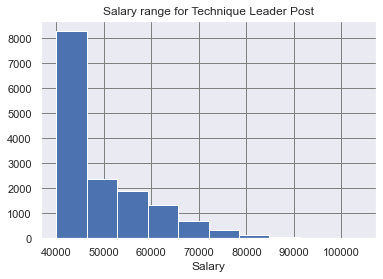

In [26]:
# Most common Salary range for "Technique Leader" title.
tech_salary = title_salary.loc[title_salary["title"]=="Technique Leader"]

# Create a histogram of Technique Leader title Salary.
plt.hist(tech_salary["salary"])
plt.title("Salary range for Technique Leader Post")
plt.xlabel("Salary")
plt.grid(color="grey")
plt.show()

In [100]:
# Bar chart showing the average salary by title.

# group by data by title.
bar_chart= title_salary.groupby("title")

# get the average salary by title.
avg = round(bar_chart["salary"].mean(),2)

# Display the average salary by title.
avg

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64

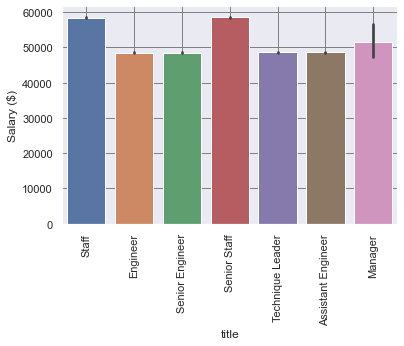

In [28]:
# Used a new method Seaborn for getting the bar plot for average salary by title.
sns.set()
graph = sns.barplot(x="title", y="salary", data=title_salary)
plt.ylabel("Salary ($)")
plt.xticks(rotation=90)
plt.grid(color="grey")
plt.show()

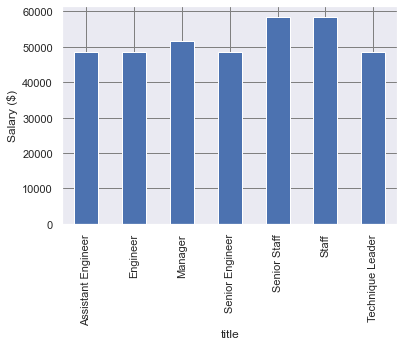

In [27]:
# Bar chart using matplotlib method.
bar_chart_1= title_salary.groupby(["title"]).mean()["salary"]
bar_chart_1.plot(kind="bar",x="title",y="salary")
plt.ylabel("Salary ($)")
plt.grid(color="grey")
plt.show()

In [138]:
# The last fun part Coincidently it's April Fools Day today. 
epilogue = pd.read_sql("SELECT * FROM employees WHERE emp_no = '499942'",connection)
epilogue

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
